In [1]:
# @copyright 2022, Shardul Rajhans.

# This is a research study for the course 'Master of Science in Data Science' performed by Shardul Rajhans 
# under the supervision of Dr Sandeep Raghuwanshi.

In [2]:
# Importing Necessary Libraries.

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Standardize price values used across datasets
import re

In [3]:
df_list=[]

aerie = pd.read_csv("Dataset/ae_com.csv")
df_list.append(aerie)

calvin_klein = pd.read_csv("Dataset/calvinklein_com.csv")
df_list.append(calvin_klein)

amazon = pd.read_csv("Dataset/amazon_com.csv")
df_list.append(amazon)

btemptd = pd.read_csv("Dataset/btemptd_com.csv")
df_list.append(btemptd)

hanky_panky = pd.read_csv("Dataset/hankypanky_com.csv")
df_list.append(hanky_panky)

macys_com = pd.read_csv("Dataset/macys_com.csv")
df_list.append(macys_com)

nordstrom_com = pd.read_csv("Dataset/shop_nordstrom_com.csv")
df_list.append(nordstrom_com)

topshop = pd.read_csv("Dataset/us_topshop_com.csv")
df_list.append(topshop)

victoria_secret = pd.read_csv("Dataset/victoriassecret_com.csv")
df_list.append(victoria_secret)

In [4]:
fashion_data = pd.DataFrame()

for df in df_list:
    fashion_data = fashion_data.append(df)

In [5]:
# Printing shape
fashion_data.shape

(613143, 14)

In [6]:
# Displaying the information of all the columns
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613143 entries, 0 to 453385
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      613143 non-null  object 
 1   mrp               613143 non-null  object 
 2   price             613143 non-null  object 
 3   pdp_url           613143 non-null  object 
 4   brand_name        613143 non-null  object 
 5   product_category  613143 non-null  object 
 6   retailer          613143 non-null  object 
 7   description       613143 non-null  object 
 8   rating            233556 non-null  float64
 9   review_count      222030 non-null  float64
 10  style_attributes  156675 non-null  object 
 11  total_sizes       613143 non-null  object 
 12  available_size    613143 non-null  object 
 13  color             612466 non-null  object 
dtypes: float64(2), object(12)
memory usage: 70.2+ MB


In [7]:
# Displaying the information of all the numeric columns
fashion_data.describe()

,rating,review_count
count,233556.000000,2.220300e+05
mean,4.254360,5.708913e+35
std,0.527576,9.170288e+36
min,0.000000,1.000000e+00
25%,4.000000,1.600000e+01
50%,4.300000,9.700000e+01
75%,4.500000,3.860000e+02
max,5.000000,1.560000e+38


# Cleaning the Dataset
In this section, we will analyze the missing values, remove the unnecessary columns, and perform all the necessary handling before Exploratory Data Analysis.

In [8]:
fashion_data.shape

(613143, 14)

In [9]:
# Drop the duplicate rows which might result in wrong results during EDA
fashion_data.drop_duplicates(inplace=True)

In [10]:
fashion_data.shape

(301026, 14)

In [11]:
fashion_data.isnull().sum()[fashion_data.isnull().sum() > 0]

rating              134718
review_count        143151
style_attributes    240108
color                  253
dtype: int64

In [12]:
# There are few columns that are not required throughout this study, hence removing the unnecessary columns.
columns_to_drop = ['pdp_url', 'retailer', 'rating', 'review_count', 'style_attributes']
fashion_data.drop(columns_to_drop, axis=1, inplace=True)
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy


In [13]:
len(fashion_data.product_category.unique())

525

In [14]:
len(fashion_data.color.unique())

2558

In [15]:
# Conversion to USD for MRP and Price Coloumn
# Reference: https://www.kaggle.com/code/justinekays/eda-for-lingerie?scriptVersionId=8012060&cellId=14

colon_to_dollar_conversion_rate = 0.0017
ind_rp_to_dollar_conversion_rate = 0.000066

def extract_usd_value(value_str):
    if type(value_str) is str:
        value_str= value_str.strip().lower().replace('usd', '').replace('$','').replace("\-.*","").strip()
        value_str = re.sub(r"-.*", "", value_str)
        value_str = re.sub(r"–.*", "", value_str)
        value_str = re.sub(r"\s.*", "", value_str)
        value_str.strip()
        
        if "₡" in value_str:
            value_str = value_str.replace("₡", "").strip()
            value_str = pd.to_numeric(value_str) * colon_to_dollar_conversion_rate            
        elif "rp" in value_str:
            value_str = value_str.replace("rp", "").strip()
            value_str = pd.to_numeric(value_str) * ind_rp_to_dollar_conversion_rate                
            
        return value_str
    else:
        return value_str
    
fashion_data['mrp']=fashion_data['mrp'].apply(extract_usd_value).apply(pd.to_numeric)
fashion_data['price']=fashion_data['price'].apply(extract_usd_value).apply(pd.to_numeric)
fashion_data.head(10)

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy
5,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Slab Gray
6,Aerie Lace Hi-Rise Boybrief,12.5,12.5,AERIE,Boybriefs,Laced with love and extra comfort. No cheek pe...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L""]",White
7,Aerie Lace Hi-Rise Boybrief,12.5,12.5,AERIE,Boybriefs,Laced with love and extra comfort. No cheek pe...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M""]",Natural Nude
8,Aerie Lace Hi-Rise Boybrief,12.5,12.5,AERIE,Boybriefs,Laced with love and extra comfort. No cheek pe...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S""]",True Black
9,Aerie Lace Hi-Rise Boybrief,12.5,12.5,AERIE,Boybriefs,Laced with love and extra comfort. No cheek pe...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M""]",Buff


In [16]:
fashion_data['color'] = fashion_data.color.str.lower()
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy


In [17]:
fashion_data['color'].unique().shape[0]

2282

In [18]:
# Categorizing the Products into Sub-Groups for generalization.
# Reference: https://www.kaggle.com/code/jkokatjuhha/data-driven-lingerie-shopping?scriptVersionId=6849300&cellId=16
def manipul_regex(str_array):
    string = '|'.join(str_array)
    return '(^|\s)(' + string + ')(\s\.|$)'

def categorize_product(data):
    panties = manipul_regex(['thong','g string','pant','v kini','boypant','pants','panty','thongs','panties',
                             'ladypant','knickers','thong','twist knicker','brief','boyshort',
                             'lace v front short','signature lace bike short','side tie bikini',
                             'signature lace string bikini','tanga','panty','hipster','vikini',
                             'cheekster', 'boypants','ladypants', 'boyshorts', 'hiphugger', 
                             'pink high leg logo bikini', 'pink shortie', 'pink logo bikini',
                             'lace sexy shortie', 'body base shorty', 'bikini bottom', 'lace mini bikini', 
                             'ruched mini bikini', 'high leg bikini'])  
    
    bodys = manipul_regex(['bodysuit', 'teddy', 'wink plaything', 'legging', 'dress'])
    bras = manipul_regex(['bra', 'bustier', 'strapless', 'balconette', 'bandeau', 'body by victoria unlined demi', 
                          'push-up', 'push up', 'push', 'pink seamless lightly lined racerback',
                          'body by wacoal seamless underwire','basic beauty wireless contour',
                          'pink lace lightly lined triangle', 'lace cross front unlined halter', 
                          'high neck keyhole halter', 'high-neck wrap'])
    
    activewear = manipul_regex(['sports bra', 'sport bra', 'sport bralette', 'sports bralette', 'strappybralette', 'full-zip'])
    suspenders = manipul_regex(['suspenders','belt'])
    bralettes = manipul_regex(['bralettes','bralette', 'bralet', 'silicone petal'])
    tops = manipul_regex(['tops','top','tee', 'tunic'])
    babydoll = manipul_regex(['babydoll','camisole and bikini set by bluebella','chemise'])
    shorts = manipul_regex(['short','shorts','chiffon tap pant'])
    slip = manipul_regex(['slip', 'waist slip', 'half-slip', 'slips', 'half-slips', 'petticoat'])
    robe = manipul_regex(['robe', 'kimonos','kimono'])
    camisole = manipul_regex(['camisole','cami','tank'])
    rompers = manipul_regex(['romper']) 
    onepiece = manipul_regex(['One-Piece', 'one piece', 'One-Piece Halter'])
    
    categories_list = [['slip',slip], ['shorts',shorts], ['robe', robe], ['tops',tops], ['suspenders',suspenders],
                 ['rompers', rompers], ['babydoll', babydoll], ['bodys',bodys], ['bralettes', bralettes], 
                 ['activewear', activewear], ['camisoles',camisole], ['bras',bras], ['panties',panties], ['onepiece', onepiece]]

    for items in categories_list:
        naming, reg = items
        data.loc[(data['product_name'].str.contains(reg, case=False)), 'product_category_wide'] = naming
    return data

In [19]:
def manipul_regex(str_array):
    string = '|'.join(str_array)
    return '(^|\s)(' + string + ')(\s|$)'

def categorize_colors(data):
    green = manipul_regex(["green", "emerald", "fir", "bayberry", "cocoon", "olive", "turquoise", "basil", 
                           "seafoam glow", "smokey pearl", "cactus"])
    blue = manipul_regex(["blue", "navy", "teal", "denim", "azure", "celeste", "turkish", "sea", "cloud", 
                          "neon", "ensign", "sky", "sapphire", "saphire", "blues", "ink", "aqua", "watercolor", 
                          "bluebell", "northstar", "bluebird", "inkblot", "nordic", "Evening Tide", "Marine"])
    white = manipul_regex(["white", "ivory", "cashew", "coconut", "marshmallow", "marble", "White/Victoria", 
                           "sugar", "suger", "moon", "Dragonfruit", "pillow", "white/rose", "White/Red"])
    red = manipul_regex(["red", "candy apple", "ginger glaze", "plum", "maroon", "ruby","cherry", "strawberry", 
                         "rose", "apple", "berry", "crimson"])
    yellow = manipul_regex(["yellow", "gold", "buff", "coral rock", 'daisy', "haze", "lime", "leopard", "bronzer", 
                            "ginger", "mango"])
    orange = manipul_regex(["orange", "peach", "sunset", "melon", "floral", "tropical", "teak", "peel", "fireworks", "firework"])
    pink = manipul_regex(["pink", "rosewater", "fuschia", "blush", "peach", "lotus", "fair orchid", "plum dust", "begonia", 
                          "hello lovely", "forever young", "lip", "lipsmacker", "dazzle", "geo", "celestial", 
                          "galaxy", "flamingo", "cream", "pinky", "mauvelous"])
    grey = manipul_regex(["gray", "grey", "pewter", "slate", "silver", "grey/blush", "heather", "Black/White", "marl", 
                          "shadow", "charcoal", "Marl/Victoria", "White/Black"])
    brown = manipul_regex(["brown", "taupe", "chai", "cappuccino", "sienna", "toast", "french roast"])
    maroon = manipul_regex(["maroon", "kir", "cinnamon"])
    purple = manipul_regex(["mauve", "lilac", "purple", "violet", "grape", "blackberry", "amethyst", "lavender", 
                            "lavendar", "red/Blue", "ignited", "eggplant", "fair orichid"])
    black = manipul_regex(["black", "midnight", "night", "Black/Victoria", "dark", "Sapphire/Black", "Black/Mesh", 
                           "Black/Zig Zag", "Black/", "black/rose", "Black/Rock", "Black/Red"])
    nude = manipul_regex(["nude", "bare", "champagne", "light", "neutral", "infinity", "dust", "flake", "Mint", 
                          "nightlife", "Snowflake", "cool", "clean", "Warm"])
    multicolor = manipul_regex(["multi", "blend", "blended", "radiating", "print", "stripe", "stripes", "chevron", 
                                "abstract", "colorblock", "spraypaint", "americana", "mesh", "spring", 
                                "french", "arrows", "arrrows", "moonray", "blocks", "curves", "coral", "rainbow", 
                                "metropolis", "border", "niagara", "aztec", "Striples", "bliss", "kaleidoscope", "party",
                               "paradise palm", "gradient", "2VN", "Seychelles", "multifolk", "C3K", "Multicolor"])
    
    colors_list = [['green',green], ['blue',blue], ['white', white], ['black',black], ['red',red],
                 ['yellow', yellow], ['orange', orange], ['pink',pink], ['nude', nude], 
                 ['grey', grey], ['brown',brown], ['maroon',maroon], ['purple',purple], ['multicolor', multicolor]]
    
    for items in colors_list:
        naming, reg = items
        data.loc[(data['color'].str.contains(reg, case=False)), 'color_group'] = naming
    return data

In [20]:
fashion_data.color.fillna('other', inplace=True)
fashion_data = categorize_colors(fashion_data)
fashion_data['color_group'].unique()

array(['green', 'nude', 'black', 'white', 'blue', 'grey', 'yellow', nan,
       'red', 'multicolor', 'maroon', 'pink', 'brown', 'purple', 'orange'],
      dtype=object)

In [21]:
fashion_data.product_category.fillna('other', inplace=True)
fashion_data = categorize_product(fashion_data)
fashion_data['product_category_wide'].unique()

array([nan, 'panties', 'bras', 'bralettes', 'babydoll', 'tops',
       'camisoles', 'shorts', 'rompers', 'bodys', 'suspenders', 'slip',
       'robe', 'activewear', 'onepiece'], dtype=object)

In [22]:
fashion_data['product_category_wide'].value_counts()

bras          215007
panties        42260
bralettes      26222
bodys           1529
babydoll        1291
slip            1204
camisoles       1052
onepiece         829
tops             805
rompers          200
shorts           174
activewear       170
robe             168
suspenders        40
Name: product_category_wide, dtype: int64

In [23]:
fashion_data['product_category_wide'].isnull().sum()

10075

In [24]:
# There are some products like bottle, basketball, etc. that are not relevant for this study, thus can be dropped.
# Also, the suspenders cateogory can be removed as it has only 2 entries.

fashion_data.product_category_wide.fillna('other', inplace=True)
fashion_data.color_group.fillna('other', inplace=True)
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


In [25]:
fashion_data.color_group.fillna('other', inplace=True)
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,AERIE,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


In [26]:
fashion_data['product_category_wide'].value_counts()

bras          215007
panties        42260
bralettes      26222
other          10075
bodys           1529
babydoll        1291
slip            1204
camisoles       1052
onepiece         829
tops             805
rompers          200
shorts           174
activewear       170
robe             168
suspenders        40
Name: product_category_wide, dtype: int64

In [27]:
fashion_data['color_group'].value_counts()

black         44380
multicolor    41481
pink          32194
blue          29509
white         28486
nude          22849
grey          18473
other         16965
purple        16656
red           12939
green         12002
yellow         8624
brown          6973
maroon         5188
orange         4307
Name: color_group, dtype: int64

In [28]:
def standardize_brand_names(brand_name):
    brand_name = brand_name.lower()
    brand_name = brand_name.replace("-", " ")
    
    if "hanky" in brand_name:
        brand_name = "hanky panky"
    elif "calvin" in brand_name:
        brand_name = "calvin klein"
    elif "wacoal" in brand_name or "tempt" in brand_name:
        brand_name = "b.tempt'd"
    elif "victoria" in brand_name:
        brand_name = "victoria's secret"
    elif "aeo" in brand_name:
        brand_name = "aerie"
    brand_name = brand_name.strip()
    return brand_name
fashion_data['brand_name'] = fashion_data['brand_name'].apply(standardize_brand_names)

In [29]:
fashion_data.brand_name.unique()

array(['aerie', 'calvin klein', "b.tempt'd", 'hanky panky',
       "victoria's secret", 's', 'fila', 'lucky brand', 'creative motion',
       'sexy hair', 'nintendo', 'compression comfort', 'vanity fair',
       'nordstrom lingerie', 'us topshop'], dtype=object)

# Univariate Analysis

In [30]:
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


In [31]:
fashion_data.shape

(301026, 11)

## mrp and price

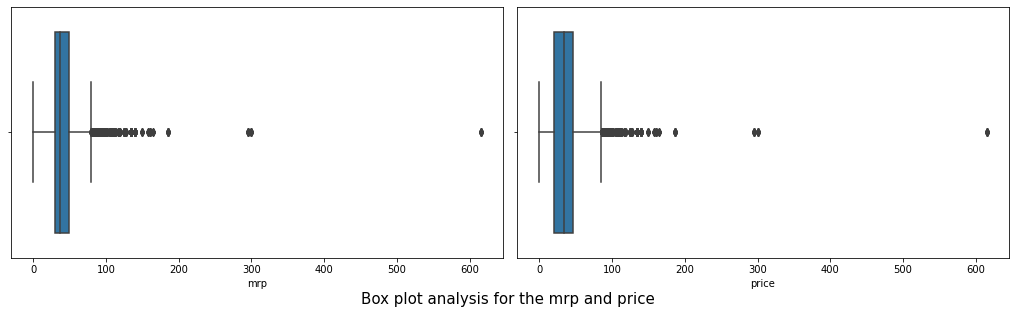

In [32]:
# Box plot for mrp, price

fig, ax = plt.subplots(1,2,figsize=(14, 4))

fig.set_constrained_layout(True)

fig.suptitle('Box plot analysis for the mrp and price', fontsize=15, y=0)

sns.boxplot(x='mrp', data = fashion_data, ax = ax[0], orient='v')

sns.boxplot(x='price', data = fashion_data, ax = ax[1], orient='v')

plt.show()

In [33]:
# Checking the statistical informations of the numerical variables

fashion_data[['price', 'mrp']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,price,mrp
count,301026.000000,301026.000000
mean,33.331434,37.319078
std,17.053397,15.983750
min,0.007716,0.007716
5%,9.990000,10.500000
25%,19.990000,29.500000
50%,34.500000,36.500000
75%,46.000000,49.500000
90%,56.500000,58.500000
95%,60.000000,62.500000


In [34]:
fashion_data = fashion_data[(fashion_data.price <= 100) & (fashion_data.price >= 5)]

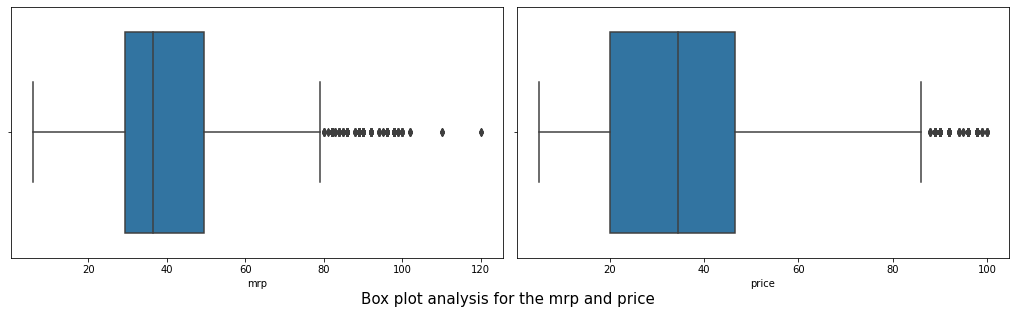

In [35]:
# Box plot for mrp, price

fig, ax = plt.subplots(1,2,figsize=(14, 4))

fig.set_constrained_layout(True)

fig.suptitle('Box plot analysis for the mrp and price', fontsize=15, y=0)

sns.boxplot(x='mrp', data = fashion_data, ax = ax[0], orient='v')

sns.boxplot(x='price', data = fashion_data, ax = ax[1], orient='v')

plt.show()

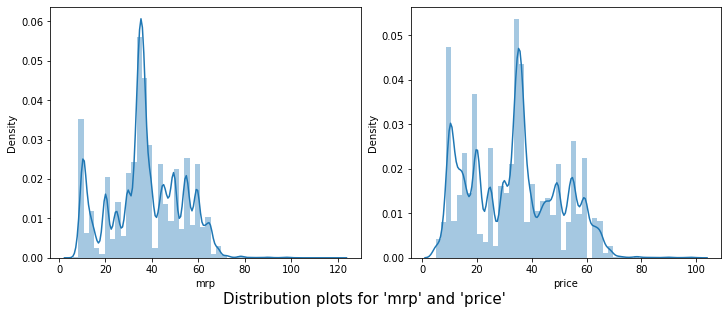

In [36]:
# Let's plot the distribution plot for the continuous columns

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.set_constrained_layout(True)
fig.suptitle("Distribution plots for 'mrp' and 'price'", fontsize=15, y=0)

sns.distplot(fashion_data['mrp'], ax=ax[0])

sns.distplot(fashion_data['price'], ax=ax[1])

plt.show()

## brand_name

In [37]:
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


In [38]:
df = pd.DataFrame(fashion_data.brand_name.value_counts()[fashion_data.brand_name.value_counts()>100])
df

,brand_name
victoria's secret,236606
b.tempt'd,21389
aerie,18258
calvin klein,12470
hanky panky,7627
us topshop,1021
vanity fair,595
nordstrom lingerie,191


In [39]:
fashion_data = fashion_data[fashion_data.brand_name.apply(lambda x: x in list(df.index))]

In [40]:
def univariate_countplot(column, x, y):
    plt.figure(figsize=(x,y))
    ax = sns.countplot(x = column, data = fashion_data, order = fashion_data[column].value_counts().iloc[:10].index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
    # Percentage of bars
    total = float(fashion_data.shape[0])
    
    for p in ax.patches:
            x = p.get_x() + p.get_width() / 2 - 0.45
            y = p.get_y() + p.get_height()
            ax.annotate(p.get_height(), (x, y), size = 12)
    plt.show()

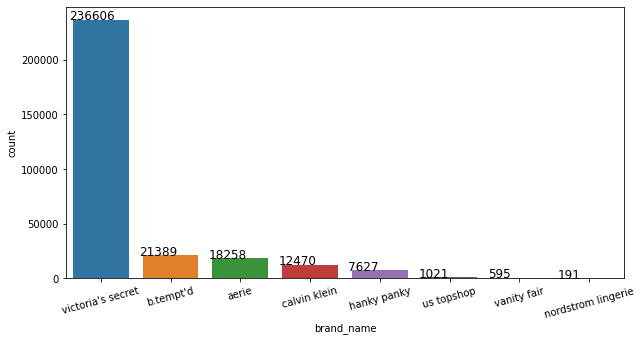

In [41]:
univariate_countplot('brand_name', 10, 5)

In [42]:
brands_name = ['aerie', 'calvin klein', "b.tempt'd", 'hanky panky', "victoria's secret",'vanity fair','nordstrom lingerie', 
               'us topshop']
df = fashion_data.groupby('brand_name').product_name.agg(['count', 'nunique'])
df = df.loc[brands_name]
df.rename(columns={'count':'Total number of items', 'nunique': 'Number of unique products' })

,Total number of items,Number of unique products
brand_name,,
aerie,18258,106
calvin klein,12470,443
b.tempt'd,21389,395
hanky panky,7627,852
victoria's secret,236606,593
vanity fair,595,43
nordstrom lingerie,191,23
us topshop,1021,281


## product_category

In [43]:
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


In [44]:
categories_name = fashion_data.product_category_wide.unique()
df = fashion_data.groupby('product_category_wide').product_name.agg(['count', 'nunique'])
df = df.loc[categories_name]
df = df.sort_values(by='count', axis=0, ascending=False)
df.rename(columns={'count':'Total number of items', 'nunique': 'Number of unique products' })

,Total number of items,Number of unique products
product_category_wide,,
bras,214593,701
panties,40095,1060
bralettes,26182,321
other,10036,311
bodys,1481,76
slip,1195,33
babydoll,1187,56
camisoles,1052,73
onepiece,829,11


## total_sizes and available_size

In [45]:
sizes_name = pd.DataFrame(fashion_data.available_size.value_counts()[fashion_data.available_size.value_counts()>7000]).index
df = fashion_data.groupby('available_size').product_name.agg(['count', 'nunique'])
df = df.loc[sizes_name]
df = df.sort_values(by='count', axis=0, ascending=False)
df.rename(columns={'count':'Total number of items', 'nunique': 'Number of unique products' })

,Total number of items,Number of unique products
S,13728,444
M,13584,451
XS,13564,437
L,13243,443
34B,8466,135
32D,8452,132
34DD,8449,118
34C,8397,133
32DD,8356,114
34D,8311,130


## color

In [46]:
color_name = fashion_data.color_group.unique()
df = fashion_data.groupby('color_group').product_name.agg(['count', 'nunique'])
df = df.loc[color_name]
df = df.sort_values(by='count', axis=0, ascending=False)
df.rename(columns={'count':'Total number of items', 'nunique': 'Number of unique products' })

,Total number of items,Number of unique products
color_group,,
black,44185,1583
multicolor,40079,534
pink,31966,544
blue,29319,758
white,28361,806
nude,22712,491
grey,18375,426
other,16912,1110
purple,16574,367


# Multivariate Analysis

In [47]:
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


## Bivariate Analysis
1. mrp vs brand_name
2. mrp vs product_category_wide
3. mrp vs color_group

4. discount vs brand_name
5. discount vs product_category_wide
6. discount vs color_group

7. color_popularity vs brand_name
8. color_popularity vs product_category_wide
9. color_popularity vs color_group


10. size_popularity vs brand_name
11. size_popularity vs product_category_wide
12. size_popularity vs color_group

In [48]:
def bivariate_boxplot(column_x, column_y, x, y):
    plt.figure(figsize=(x,y))
    ax = sns.boxplot(x = column_x, y = column_y, data = fashion_data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
    plt.show()

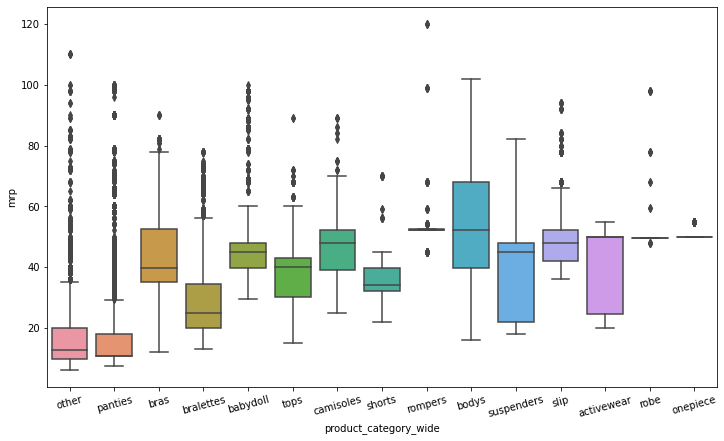

In [49]:
# mrp range for products category
bivariate_boxplot('product_category_wide', 'mrp', 12, 7)

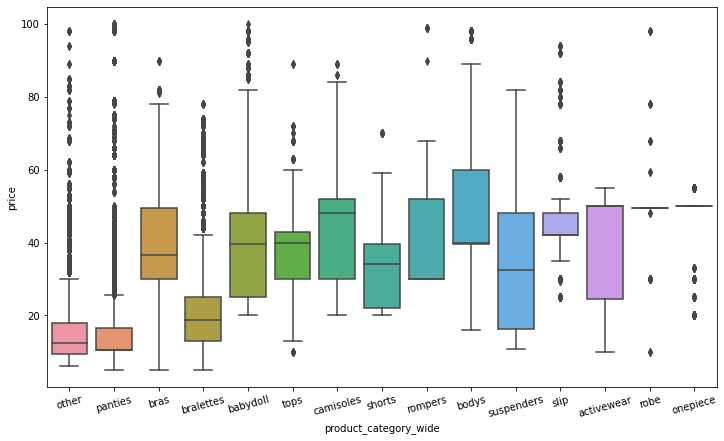

In [50]:
# price range for products category
bivariate_boxplot('product_category_wide', 'price', 12, 7)

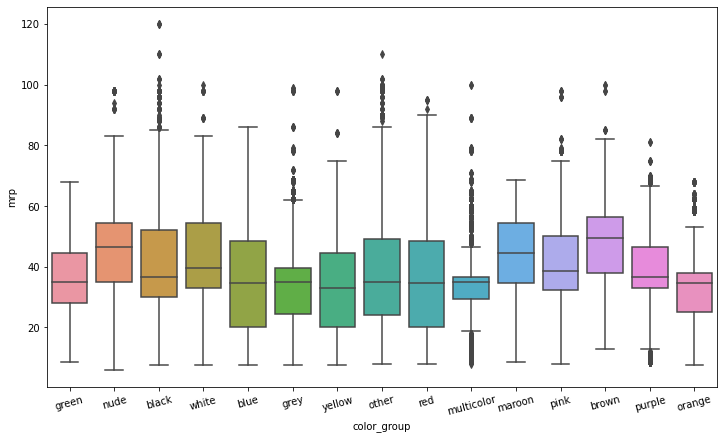

In [51]:
# mrp range for products category
bivariate_boxplot('color_group', 'mrp', 12, 7)

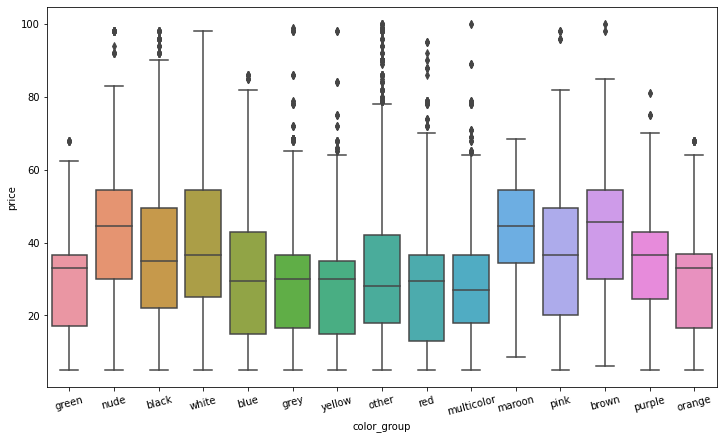

In [52]:
# price range for products category
bivariate_boxplot('color_group', 'price', 12, 7)

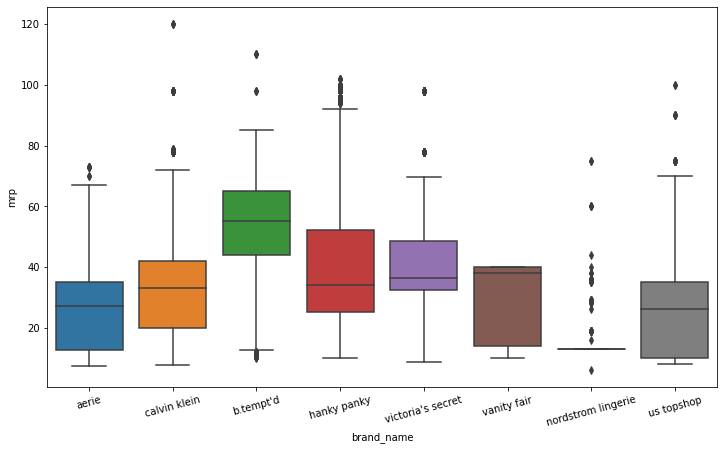

In [53]:
# mrp range for products category
bivariate_boxplot('brand_name', 'mrp', 12, 7)

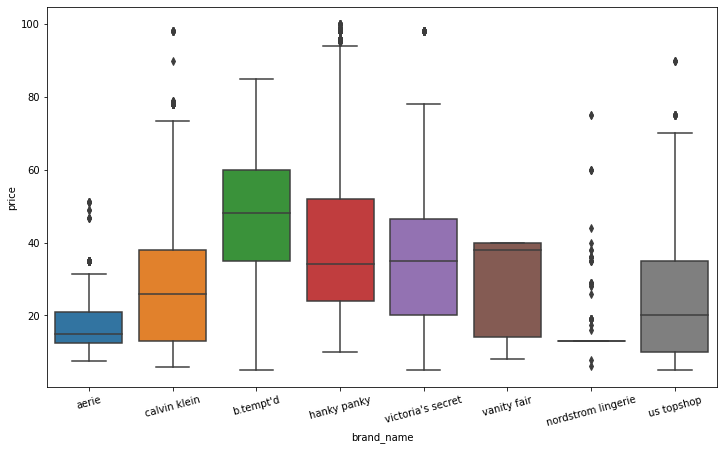

In [54]:
# price range for products category
bivariate_boxplot('brand_name', 'price', 12, 7)

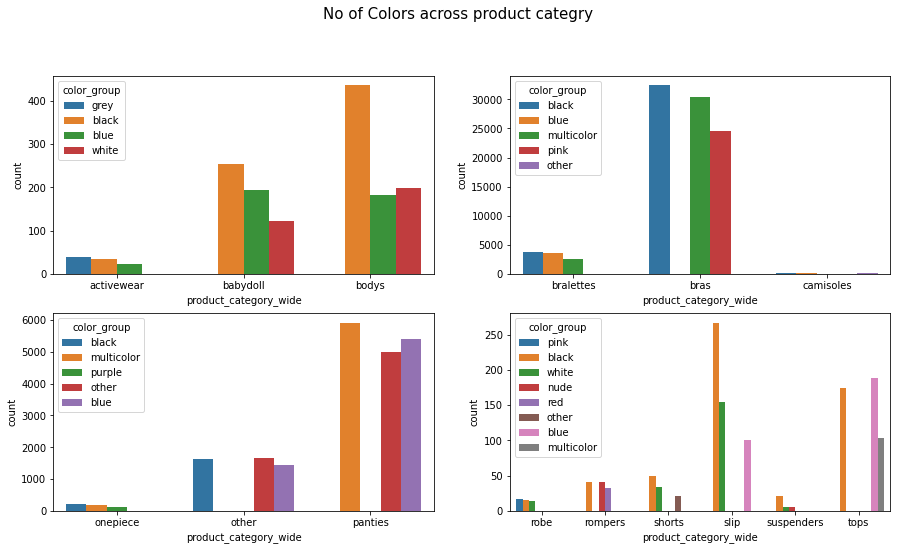

In [56]:
vst = fashion_data.groupby(['product_category_wide', 'color_group'])['product_category_wide'].agg({'count'})
vst = vst['count'].groupby('product_category_wide', group_keys=False).nlargest(3)
vst = pd.DataFrame(vst).reset_index(drop=False)


fig, ax = plt.subplots(2,2,figsize=(15, 8))
fig.suptitle('No of Colors across product categry',fontsize=15,y=1)
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[:9], ax = ax[0][0])
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[9:18], ax = ax[0][1])
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[18:27], ax = ax[1][0])
sns.barplot(x = 'product_category_wide', hue='color_group', y = 'count', data = vst.iloc[27:], ax = ax[1][1])
plt.show()

In [69]:
def general_plot(money = 'mrp'):
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,4))
    ax = sns.boxplot(x=money, y= 'brand_name', data = fashion_data[fashion_data[money]<100], palette = sns.cubehelix_palette(11), order = brands_name) 
    _ = ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)


    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,4))
    ax.xaxis.grid(True)
    ax = sns.barplot(y=money, x = 'brand_name', data = fashion_data, palette = sns.light_palette("purple",n_colors=8)[1:], ax = axes[0], order = brands_name)
    ax.yaxis.grid(True)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)
    ax = sns.barplot(y=money, x = 'brand_name', data = fashion_data, palette = sns.light_palette("purple",n_colors=8)[1:], estimator=np.median, ax = axes[1], order = brands_name)
    ax.yaxis.grid(True)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)

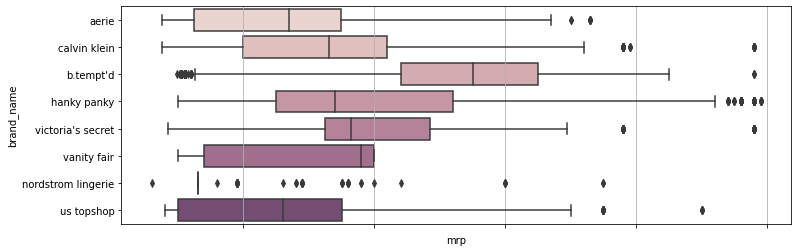

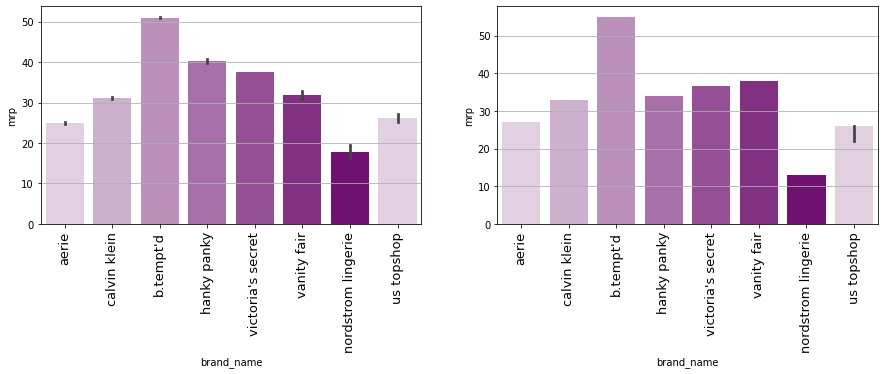

In [70]:
general_plot()

In [71]:
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other


In [72]:
# %discount calculation for each product.
fashion_data['%discount'] = round((1-(fashion_data.price/fashion_data.mrp))*100, 2)
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide,%discount
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other,0.0
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other,0.0
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other,0.0
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other,0.0
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other,0.0


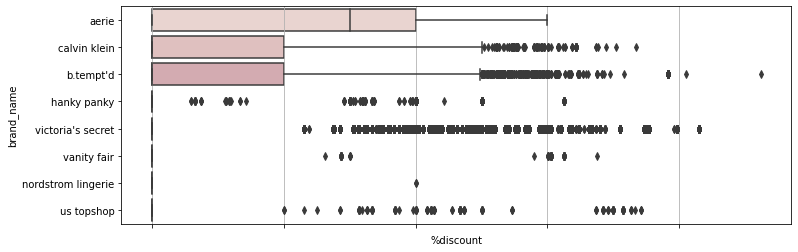

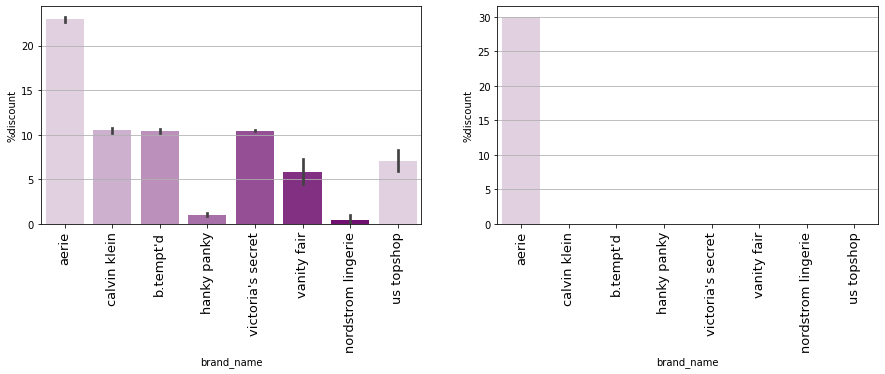

In [73]:
general_plot('%discount')

In [89]:

def generate_plot(money = 'mrp'):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,4))
    ax = sns.barplot(y=money, x = 'color_group', data = fashion_data, palette = sns.light_palette("purple",n_colors=8)[1:], ax = axes[0])
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)
    ax = sns.barplot(y=money, x = 'available_size', data = fashion_data, palette = sns.light_palette("purple",n_colors=8)[1:], ax = axes[1], order = fashion_data.available_size.value_counts()[fashion_data.available_size.value_counts()>7000].index)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)

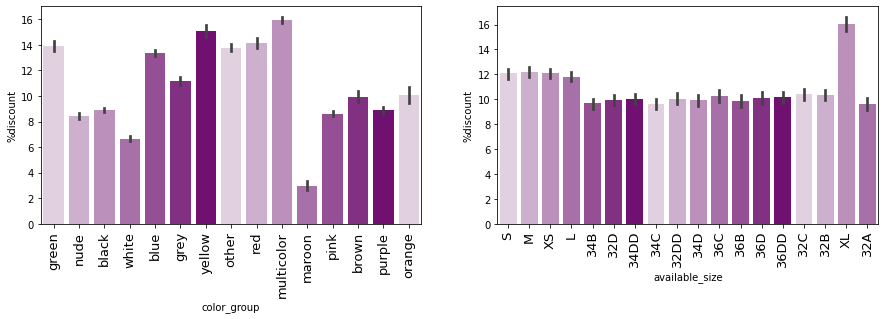

In [90]:
generate_plot('%discount')

In [92]:
fashion_data.head()

,product_name,mrp,price,brand_name,product_category,description,total_sizes,available_size,color,color_group,product_category_wide,%discount
0,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",rugged green,green,other,0.0
1,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",natural nude,nude,other,0.0
2,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",true black,black,other,0.0
3,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",white,white,other,0.0
4,Aerie Everyday Loves Lace Cheeky,12.5,12.5,aerie,Cheekies,Introducing Everyday Loves™: Made with love. E...,"[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",royal navy,blue,other,0.0


In [95]:
fashion_data.description[0]

0    Introducing Everyday Loves™: Made with love. E...
0    soft cotton stretch fabric and a metallic logo...
0    An unlined demi cup bra featuring sheer, sexy ...
0    Say “buongiorno!” to this ladylike piece that ...
0    Hanky Panky Silky is the ideal fabric for unde...
0    The perfect amount of coverage in a subtle sil...
0    Lighter-than-air, full-cut Supima® cotton brie...
0    These feminine black knickers for maternity fe...
0    Lots of cheek peek, pretty lace, a strappy bac...
Name: description, dtype: object

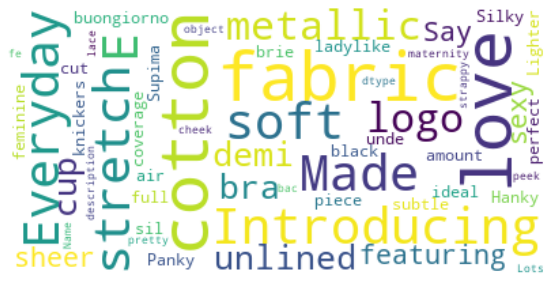

In [99]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize=(10,5))

# Start with one review:
text = str(fashion_data.description[0])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()